In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
%matplotlib inline


In [164]:
train = pd.read_csv('tested.csv')

In [165]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [166]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


<Axes: >

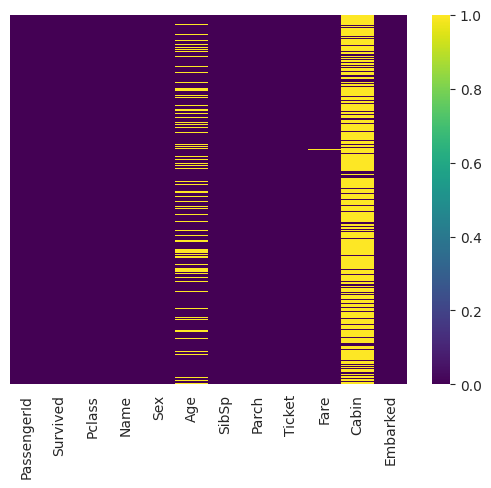

In [167]:

 sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis')

In [168]:
sns.set_style('whitegrid')

<Axes: xlabel='Survived', ylabel='count'>

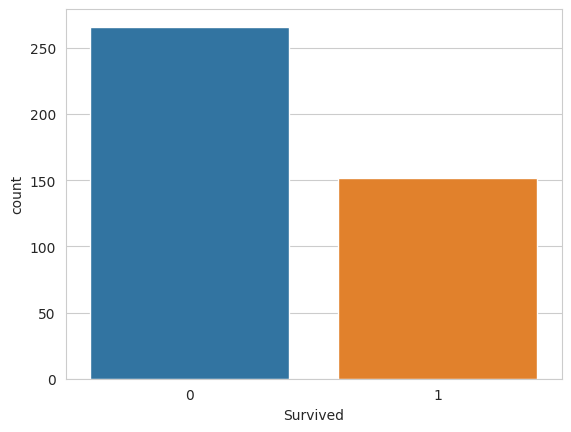

In [169]:
sns.countplot(x='Survived', data=train)

<Axes: xlabel='Survived', ylabel='count'>

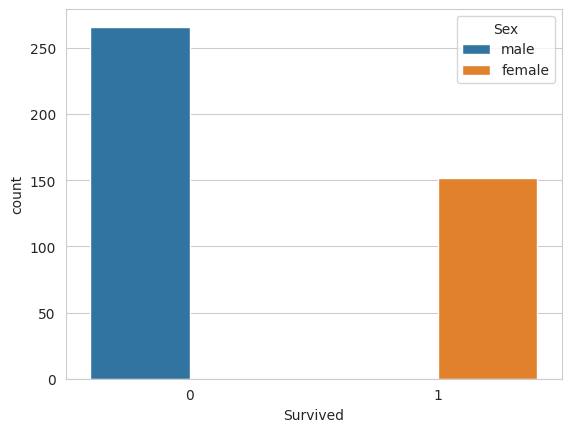

In [170]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex', data=train )

<Axes: xlabel='Survived', ylabel='count'>

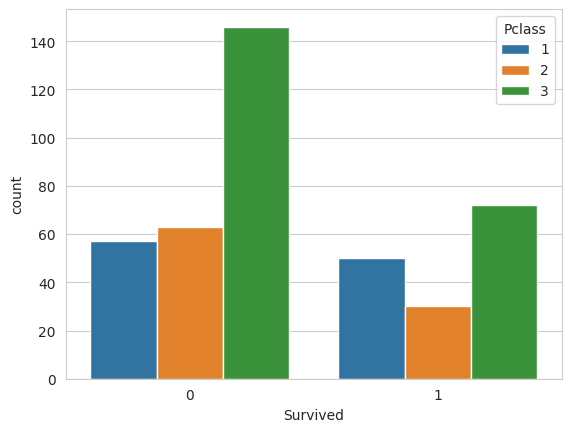

In [171]:
sns.countplot(x='Survived' ,hue='Pclass',data=train)

<Axes: xlabel='Survived', ylabel='count'>

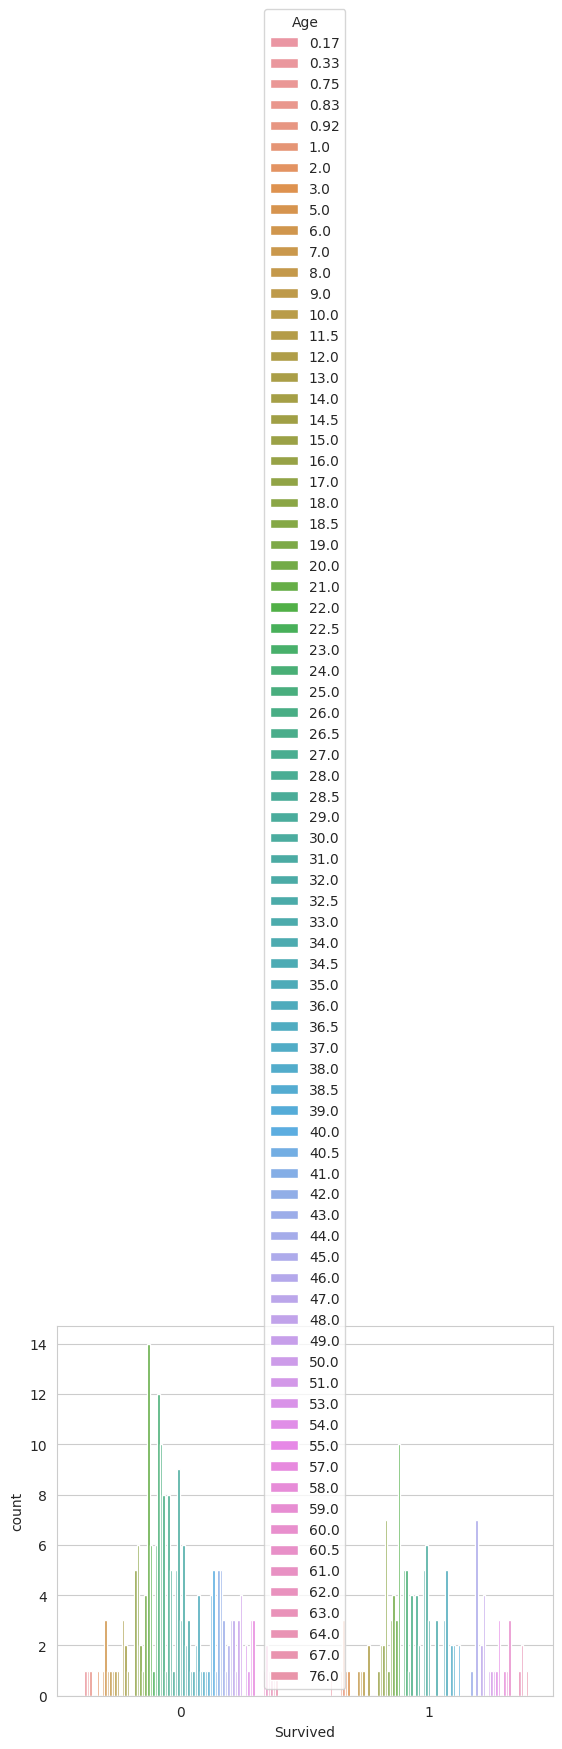

In [172]:
sns.countplot(x='Survived', hue='Age', data=train)

/tmp/ipykernel_70770/2177024666.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].dropna(),kde=False,bins=40)


<Axes: xlabel='Age'>

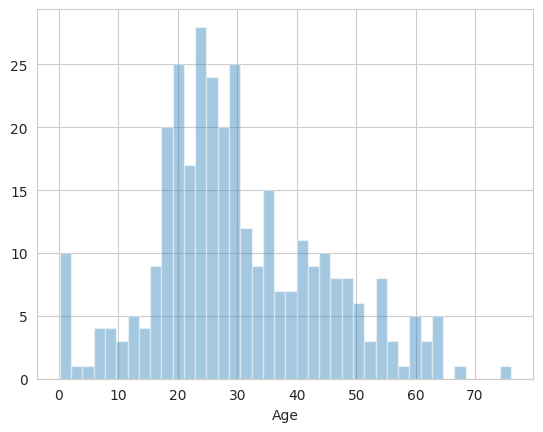

In [173]:
sns.distplot(train['Age'].dropna(),kde=False,bins=40)

<Axes: xlabel='SibSp', ylabel='count'>

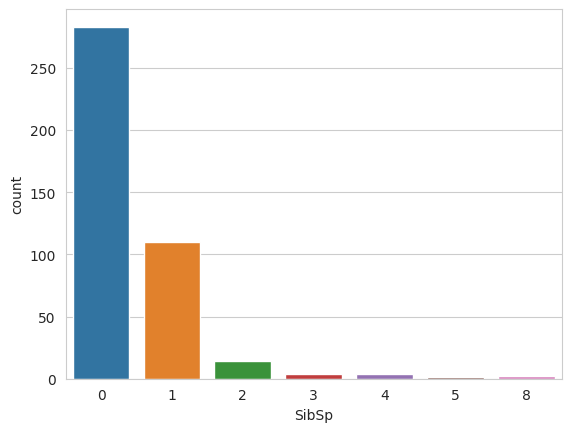

In [174]:
sns.countplot(x='SibSp',data=train)

<Axes: xlabel='Pclass', ylabel='Age'>

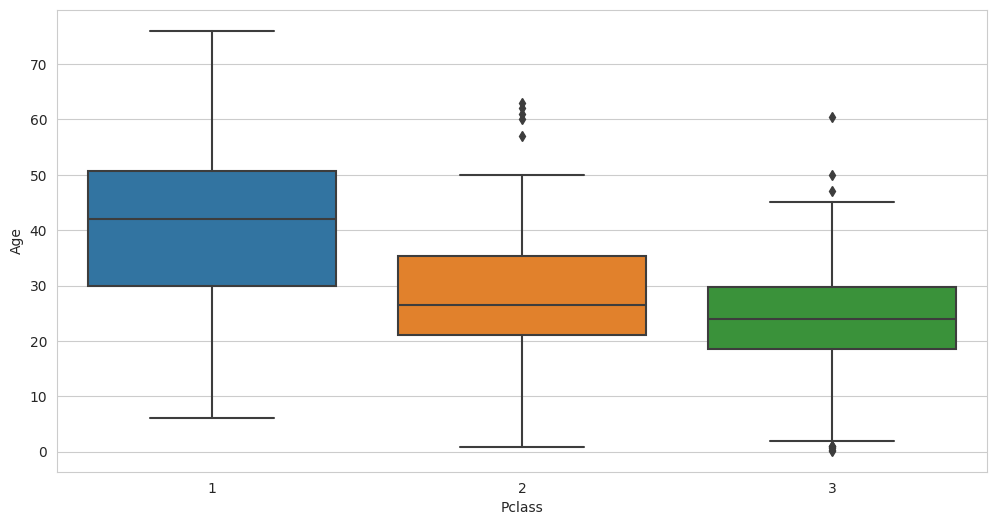

In [175]:
plot.figure(figsize=(12,6))
sns.boxplot(x='Pclass',y='Age', data=train)

In [176]:
def impute_age(cols):
  Age=cols[0]
  Pclass=cols[1]
  if pd.isnull(Age):
        if Pclass==1:
             return 37
        elif Pclass == 2 :
             return 29
        else:
             return 24
  else:
      return Age

In [177]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

<Axes: >

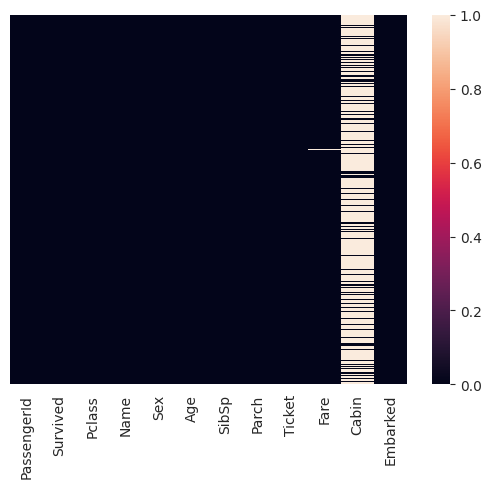

In [178]:
sns.heatmap(train.isnull(),yticklabels=False)

In [179]:
train.head(100)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,987,0,3,"Tenglin, Mr. Gunnar Isidor",male,25.0,0,0,350033,7.7958,NaN,S
96,988,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S
97,989,0,3,"Makinen, Mr. Kalle Edvard",male,29.0,0,0,STON/O 2. 3101268,7.9250,NaN,S
98,990,1,3,"Braf, Miss. Elin Ester Maria",female,20.0,0,0,347471,7.8542,NaN,S


In [180]:
train.drop('Cabin',axis=1,inplace=True )

In [181]:
train.dropna(inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Survived     417 non-null    int64  
 2   Pclass       417 non-null    int64  
 3   Name         417 non-null    object 
 4   Sex          417 non-null    object 
 5   Age          417 non-null    float64
 6   SibSp        417 non-null    int64  
 7   Parch        417 non-null    int64  
 8   Ticket       417 non-null    object 
 9   Fare         417 non-null    float64
 10  Embarked     417 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 39.1+ KB


In [182]:
pd.get_dummies(train['Embarked'],drop_first=True).head()

,Q,S
0,True,False
1,False,True
2,True,False
3,False,True
4,False,True


In [183]:
sex=pd.get_dummies(train['Sex'],drop_first=True)
embark=pd.get_dummies(train['Embarked'],drop_first=True)



In [184]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1, inplace=True)

In [185]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,892,0,3,34.5,0,0,7.8292
1,893,1,3,47.0,1,0,7.0000
2,894,0,2,62.0,0,0,9.6875
3,895,0,3,27.0,0,0,8.6625
4,896,1,3,22.0,1,1,12.2875


In [186]:
train = pd.concat([train,sex,embark],axis=1)

In [187]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,0,3,34.5,0,0,7.8292,True,True,False
1,893,1,3,47.0,1,0,7.0000,False,False,True
2,894,0,2,62.0,0,0,9.6875,True,True,False
3,895,0,3,27.0,0,0,8.6625,True,False,True
4,896,1,3,22.0,1,1,12.2875,False,False,True


In [188]:
train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,True,True,False
1,893,3,47.0,1,0,7.0000,False,False,True
2,894,2,62.0,0,0,9.6875,True,True,False
3,895,3,27.0,0,0,8.6625,True,False,True
4,896,3,22.0,1,1,12.2875,False,False,True


In [189]:
train['Survived'].head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [190]:
from sklearn.model_selection import train_test_split

In [210]:
x_train,x_test,y_train,y_test= train_test_split(train.drop('Survived',axis=1),train['Survived'],test_size=0.30,random_state=42)

In [211]:
from sklearn.linear_model import LogisticRegression

In [212]:
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

/home/abhishek/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [194]:
predictions = logmodel.predict(x_test)

In [195]:
from sklearn.metrics import confusion_matrix

In [196]:
acc=confusion_matrix(y_test,predictions)

In [197]:
acc

array([[65,  0],
       [ 0, 61]])

In [198]:
from sklearn.metrics import accuracy_score

In [199]:
acc=accuracy_score(predictions,y_test)

In [200]:
acc

1.0

In [201]:
predictions

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1])